https://www.youtube.com/watch?v=Wqmtf9SA_kk

In [1216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1217]:
data = pd.read_csv("nybolig_data.csv")


In [1218]:
data

,url,address,postal_code,type,price,size,basement_size,rooms,year_built,year_rebuilt,energy_label
0,https://www.nybolig.dk/villa/3100/arfriisvej/2...,A R Friis Vej 9 3100 Hornbæk,3100,villa,9975000,269,12.0,9,1895,1999.0,D
1,https://www.nybolig.dk/fritidshus/7990/akoldin...,A. Koldings Vej 8 Sillerslev 7990 Øster Assels,7990,fritidsbolig,1495000,96,0.0,4,2008,NaN,NaN
2,https://www.nybolig.dk/villa/6400/aabenraavej/...,Aabenraavej 103 Ragebøl 6400 Sønderborg,6400,villa,1295000,219,0.0,7,1924,NaN,E
3,https://www.nybolig.dk/villa/6100/aabenraavej/...,Aabenraavej 59 6100 Haderslev,6100,villa,2495000,226,35.0,6,1947,2010.0,C
4,https://www.nybolig.dk/villa/9240/aagade/27020...,Aagade 4 Vegger 9240 Nibe,9240,villa,495000,159,59.0,4,1958,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...
5420,https://www.nybolig.dk/villa/8210/oestrevej/25...,Østrevej 5 Hasle 8210 Aarhus V,8210,villa,5248000,111,90.0,6,1928,2012.0,C
5421,https://www.nybolig.dk/villa/8930/oestrupvej/2...,Østrupvej 11 Albæk 8930 Randers NØ,8930,villa,995000,231,0.0,6,1850,2006.0,E
5422,https://www.nybolig.dk/villa/7130/oestrupvej/2...,Østrupvej 26 Glud 7130 Juelsminde,7130,villa,895000,83,6.0,4,1952,NaN,D
5423,https://www.nybolig.dk/villa/7130/oestrupvej/2...,Østrupvej 49 Glud 7130 Juelsminde,7130,villa,3995000,241,0.0,7,1986,2008.0,A2010


In [1219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            5425 non-null   object 
 1   address        5425 non-null   object 
 2   postal_code    5425 non-null   int64  
 3   type           5425 non-null   object 
 4   price          5425 non-null   int64  
 5   size           5425 non-null   int64  
 6   basement_size  4528 non-null   float64
 7   rooms          5425 non-null   int64  
 8   year_built     5425 non-null   int64  
 9   year_rebuilt   2049 non-null   float64
 10  energy_label   4789 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 466.3+ KB


In [1220]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis = 1)
y = data['price']

array([[<Axes: title={'center': 'postal_code'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'size'}>],
       [<Axes: title={'center': 'basement_size'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'year_built'}>],
       [<Axes: title={'center': 'year_rebuilt'}>, <Axes: >, <Axes: >]],
      dtype=object)

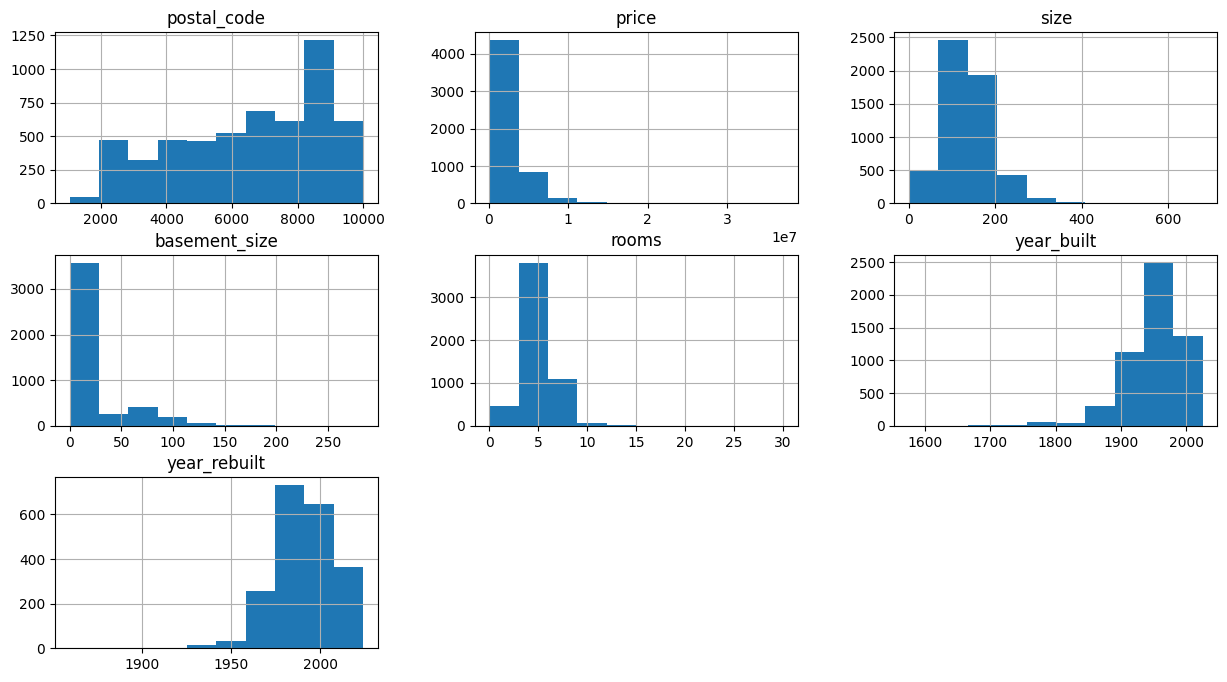

In [1221]:
data.hist(figsize = (15, 8))

<Axes: >

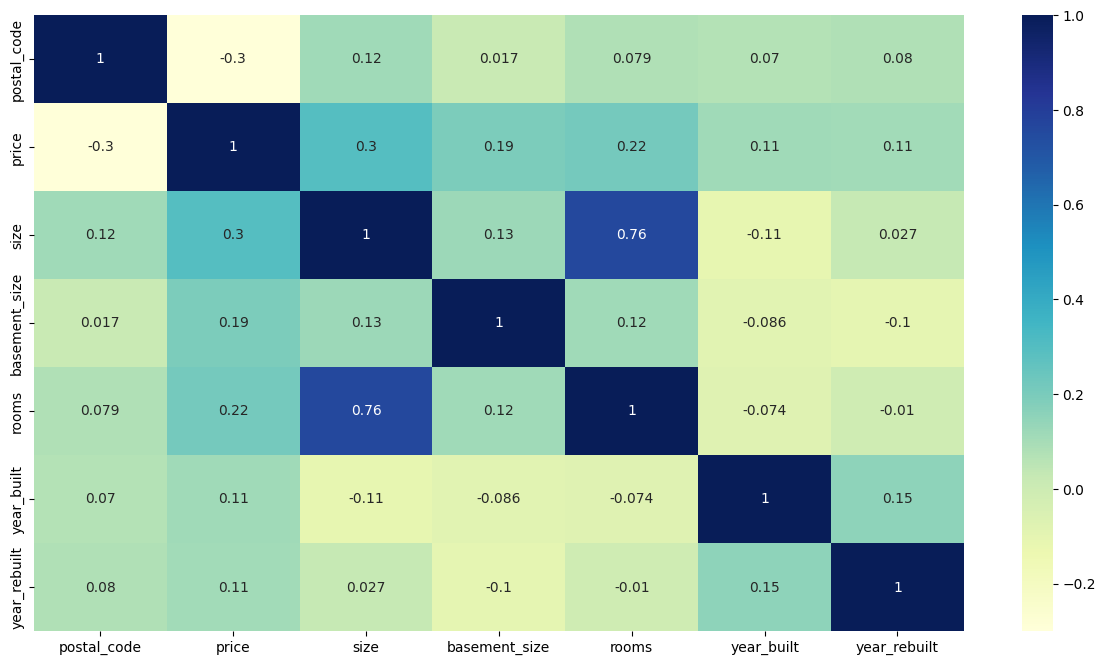

In [1222]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot = True, cmap = "YlGnBu")

# Preprocessing

In [1223]:
def preprocess_data(data, transformations: bool = False, one_hot_encoding: bool = False) -> pd.DataFrame:
    # Drop the columns that are not needed
    data['year_rebuilt'] = data['year_rebuilt'].where(~data['year_rebuilt'].isna(), data['year_built']).astype(int)
    data = data.dropna()
    data = data.drop(['url', 'address'], axis = 1)

    if transformations:
        data['postal_code'] = (data['postal_code'] + 1) ** 2
        data['rooms'] = np.log(data['rooms'] + 1)
        data['size'] = np.log(data['size'] + 1)
        data['basement_size'] = np.log(data['basement_size'] + 1)
        data['year_built'] = (data['year_built'] + 1) ** 2
        data['year_rebuilt'] = (data['year_rebuilt'] + 1) ** 2
    if one_hot_encoding:
        data = pd.get_dummies(data, columns = ['type', 'energy_label'], drop_first = True, dtype=int)
        
    return data

In [1224]:
preprocessed_data = preprocess_data(data, transformations = False, one_hot_encoding = True)

array([[<Axes: title={'center': 'postal_code'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'basement_size'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'year_built'}>,
        <Axes: title={'center': 'year_rebuilt'}>,
        <Axes: title={'center': 'type_rækkehus'}>],
       [<Axes: title={'center': 'type_villa'}>,
        <Axes: title={'center': 'type_villalejlighed'}>,
        <Axes: title={'center': 'energy_label_A2'}>,
        <Axes: title={'center': 'energy_label_A2010'}>],
       [<Axes: title={'center': 'energy_label_A2015'}>,
        <Axes: title={'center': 'energy_label_A2020'}>,
        <Axes: title={'center': 'energy_label_B'}>,
        <Axes: title={'center': 'energy_label_C'}>],
       [<Axes: title={'center': 'energy_label_D'}>,
        <Axes: title={'center': 'energy_label_E'}>,
        <Axes: title={'center': 'energy_label_F'}>,
        <Axes: title={'center': '

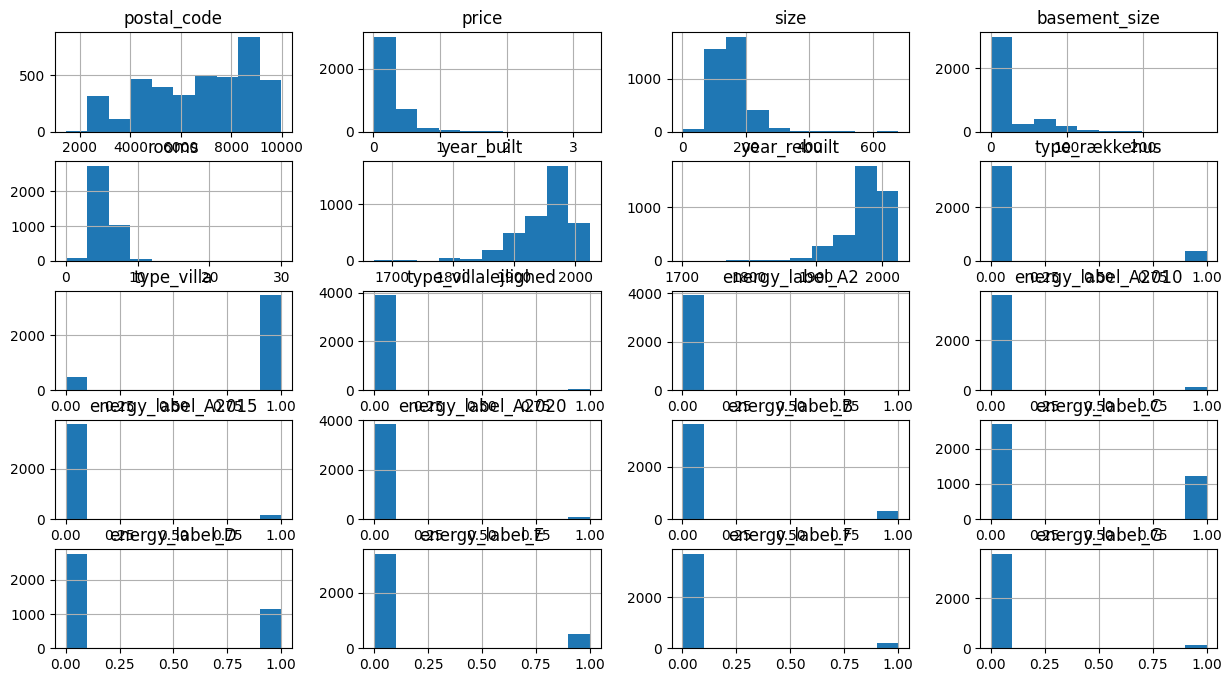

In [1225]:
preprocessed_data.hist(figsize = (15, 8))

<Axes: >

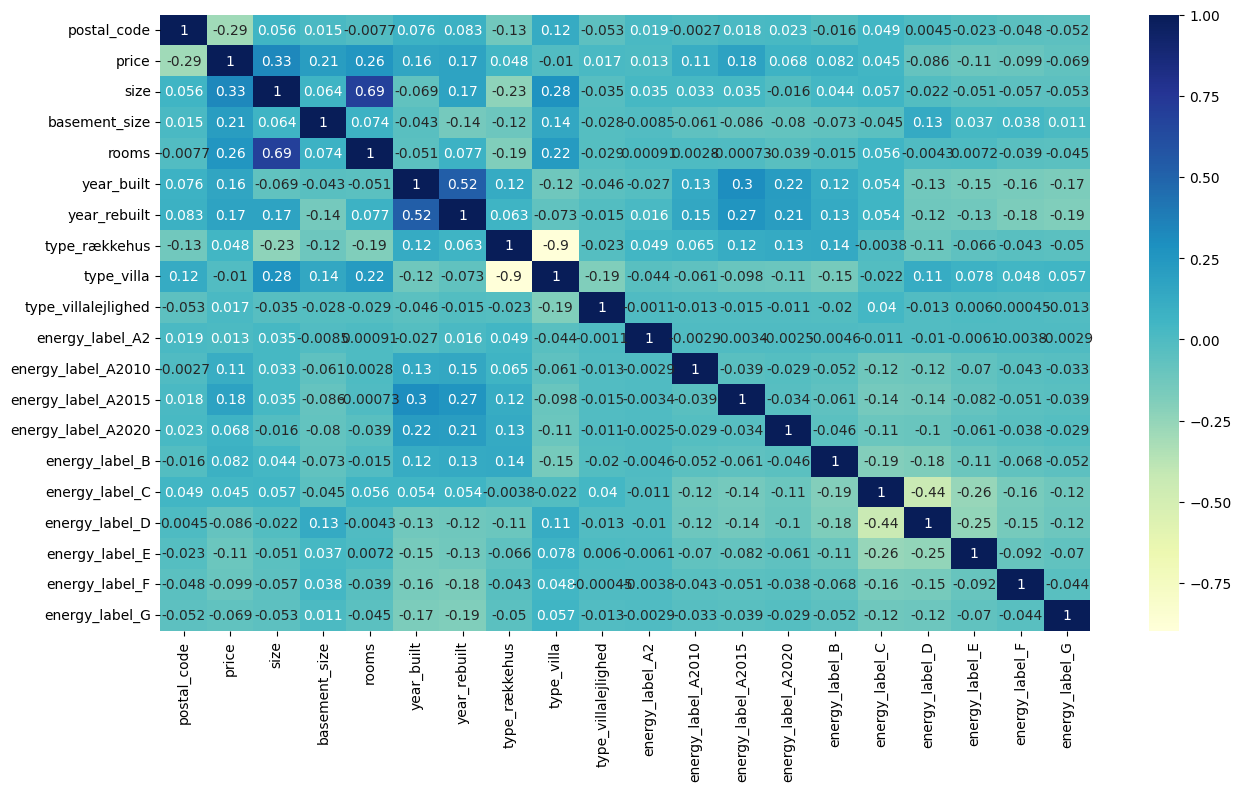

In [1226]:
plt.figure(figsize = (15, 8))
sns.heatmap(preprocessed_data.select_dtypes(include = np.number).corr(), annot = True, cmap = "YlGnBu")

In [1227]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data.drop(['price'], axis = 1), preprocessed_data['price'], test_size = 0.2)
X_train

,postal_code,size,basement_size,rooms,year_built,year_rebuilt,type_rækkehus,type_villa,type_villalejlighed,energy_label_A2,energy_label_A2010,energy_label_A2015,energy_label_A2020,energy_label_B,energy_label_C,energy_label_D,energy_label_E,energy_label_F,energy_label_G
5113,7870,180,80.0,4,1962,1974,0,1,0,0,0,0,0,0,1,0,0,0,0
3956,8800,203,28.0,6,1956,1995,0,1,0,0,0,0,0,0,0,1,0,0,0
1578,7730,168,0.0,6,1980,1980,0,1,0,0,0,0,0,0,1,0,0,0,0
1018,7130,111,0.0,4,2000,2000,0,0,0,0,0,0,0,0,1,0,0,0,0
4928,7150,120,55.0,4,1967,1967,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,2791,163,0.0,5,1957,2011,0,1,0,0,0,0,0,0,1,0,0,0,0
3121,7700,136,80.0,4,1908,1908,0,1,0,0,0,0,0,0,0,1,0,0,0
2847,5500,143,0.0,4,1953,2013,0,1,0,0,0,0,0,1,0,0,0,0,0
2427,7870,107,60.0,4,1959,1974,0,1,0,0,0,0,0,0,1,0,0,0,0


# Regression 

Before performing regression, we encode labels for the "Type of house" and the "Energy Label". 


In [1228]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

warnings.simplefilter(action='ignore', category=FutureWarning)
np.set_printoptions(suppress=True)

In [1229]:
"""
The type of the house  and energy_label is a categorical variable, 
and we need to encode it to a numerical value. 
We can use the LabelEncoder from sklearn to do this.
"""
def encodeData(x_data: pd.DataFrame, scaling:bool) -> pd.DataFrame:
    #Encode the type and energy_label to numbers
    x_data['type'] = LabelEncoder().fit_transform(x_data['type'])
    x_data['energy_label'] = LabelEncoder().fit_transform(x_data['energy_label'])
    #Drop the address and URL 
    x_data = x_data.drop(['address'], axis = 1)
    x_data = x_data.drop(['url'], axis = 1)
    #If Rebuilds = None, set year_rebuilt = year_built
    x_data['year_rebuilt'] = x_data['year_rebuilt'].where(~x_data['year_rebuilt'].isna(), x_data['year_built']).astype(int)
    x_data['basement_size'] = x_data["basement_size"].fillna(0)

    #Check for any NaN values
    for index, row in x_data.iterrows():
      if row.isna().any():
        print("Row", index, "contains NaN values:")
        print(row)
        raise ValueError("NaN values in row", index)
    
    #Scale the dataset
    if scaling: 
      scaler = StandardScaler()
      x_data = pd.DataFrame(scaler.fit_transform(x_data), columns = x_data.columns)
    return x_data

# encoded_X_train = encodeData(X_train, scaling=True)
# encoded_X_test = encodeData(X_test, scaling=True)
# display(encoded_X_train)

## Lasso and Ridge Regression 

c:\Repos\house_price_regression\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.579e+15, tolerance: 1.860e+12
  model = cd_fast.enet_coordinate_descent(
c:\Repos\house_price_regression\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.725e+13, tolerance: 1.490e+12
  model = cd_fast.enet_coordinate_descent(
c:\Repos\house_price_regression\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Scores [0.31243814 0.36226195 0.33562253 0.39394874 0.36674794]
Test score:  0.2615852892825621

Coefficients: 
postal_code: -372.43269716177184
size: 13244.829057596979
basement_size: 18202.06412166143
rooms: 63160.87501201303
year_built: 4224.43262978696
year_rebuilt: 1040.8652518566478
type_rækkehus: 1212984.170959798
type_villa: 856737.0124880777
type_villalejlighed: 1841379.2017674472
energy_label_A2: 0.0
energy_label_A2010: 510177.56576824095
energy_label_A2015: 778567.6953889932
energy_label_A2020: 223036.3934493942
energy_label_B: -416839.0929337743
energy_label_C: -829279.5376669368
energy_label_D: -1379304.564761455
energy_label_E: -1548332.000426083
energy_label_F: -1900703.495747783
energy_label_G: -1602085.1054543431

Intercept:  -7751865.284391564


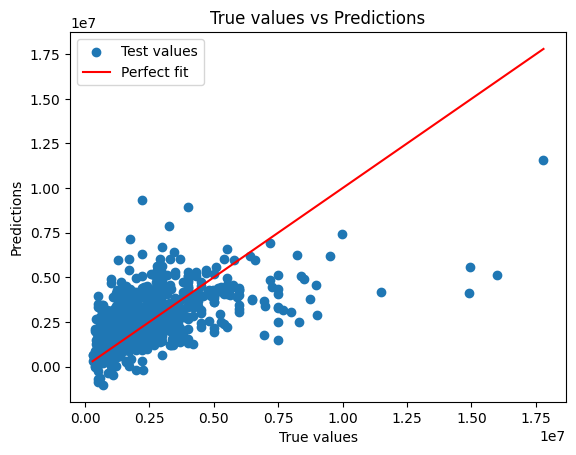

Scores [0.31418314 0.36235133 0.33411606 0.38953366 0.36571042]
Test score:  0.26248107336968285

Coefficients: 
postal_code: -373.52489970744773
size: 13518.480414421369
basement_size: 18079.995568607523
rooms: 61158.47394390959
year_built: 4594.774221390375
year_rebuilt: 1398.4006323498277
type_rækkehus: 797096.3333110659
type_villa: 422409.4358918294
type_villalejlighed: 873159.48398738
energy_label_A2: 0.0
energy_label_A2010: 1052758.6763365506
energy_label_A2015: 1323845.1044135985
energy_label_A2020: 769919.9360957427
energy_label_B: 221597.9915047525
energy_label_C: -144874.38817808506
energy_label_D: -675032.7283880572
energy_label_E: -816939.3452641574
energy_label_F: -1115458.8681361964
energy_label_G: -796926.6149775814

Intercept:  -9463085.416967083


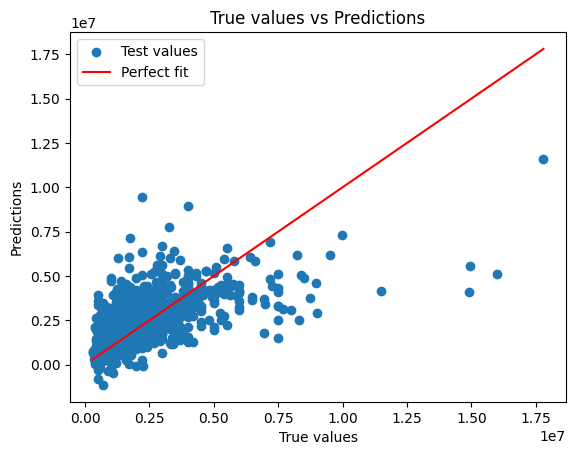

In [1230]:

def regression(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    score = cross_val_score(model, x_train, y_train, cv = 5)
    print("Scores", score)
    print("Test score: ", model.score(x_test, y_test))
    #print(x_train.columns)
    print("\nCoefficients: ")
    for feature, coef in zip(x_train.columns, model.coef_):
        print(f"{feature}: {coef}")
    print("\nIntercept: ", model.intercept_)

    #Predicting the test set results
    y_pred = model.predict(x_test)
    #Plotting the test set results
    plt.scatter(y_test, y_pred)
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    #Plotting the perfect fit line
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c = 'r')
    #Name the perfect fit line
    plt.legend(['Test values', 'Perfect fit'])
    plt.title('True values vs Predictions')
    plt.show()

#linear_model_ = linear_model.LinearRegression()
lasso_model = linear_model.Lasso(alpha = 10)
ridge_model = linear_model.Ridge(alpha = 10)
#regression(linear_model_, encoded_X_train, y_train, encoded_X_test, y_test)
regression(lasso_model, X_train, y_train, X_test, y_test)
regression(ridge_model, X_train, y_train, X_test, y_test)

For this results, we have the following: 
  1. Lasso Scores: These are cross-validation scores obtained using 5-fold cross-validation. They represent the R-squared values achieved by the Lasso model on different folds of the training data. Each score corresponds to one fold.
  2. Lasso test score: This is the R-squared score of the model on the held-out test set.
  3. Lasso coefficients: These are the weights assigned to each feature by the Lasso model. 
  4. Lasso intercept: This is the bias term of the model.